<font size=8> DynapSE2 Just Run Tests


In [4]:
#normal python import
from pickle import TRUE
import time
import sys#Common Python Packages
from pickle import TRUE
import pickle
import numpy as np
import matplotlib.pyplot as plt
import timeout_decorator

#dynapse2 spikegen imports
from lib.dynapse2_util import *
from lib.dynapse2_network import Network
from lib.dynapse2_spikegen import send_events,get_fpga_time, send_virtual_events, poisson_gen, isi_gen,regular_gen
from lib.dynapse2_raster import *
from lib.dynapse2_obj import *

#Statistics imports
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from itertools import product
#my imports
from adaptation import pc_single,ff,pc_pv_sst,ff_network
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from configs import neuron_configs_bio


# Determine the user's home directory
home_directory = os.path.expanduser("~")
# Path to the Documents directory
documents_path = os.path.join(home_directory, "Documents")
# Path to the dynapse-se2-data directory within Documents
base_path = os.path.join(documents_path, "dynapse-se2-data")
@timeout_decorator.timeout(40)  # Set a 5-second timeout
def run_simulation(neuron_config):
    return pc_pv_sst.pc_pv_sst(
        board=board,
        profile_path=profile_path,
        number_of_chips=number_of_chips,
        neuron_config=neuron_config
    )
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + '/..')

#dynapse2 spikegen imports
from lib.dynapse2_util import *
from lib.dynapse2_network import Network
from lib.dynapse2_spikegen import send_events,get_fpga_time, send_virtual_events, poisson_gen, isi_gen,regular_gen
from lib.dynapse2_raster import *
from lib.dynapse2_obj import *

#Statistics imports
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression

#my imports
from adaptation import pc_single
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from adaptation_lib.tc_extraction import *

# Determine the user's home directory
home_directory = os.path.expanduser("~")
# Path to the Documents directory
documents_path = os.path.join(home_directory, "Documents")
# Path to the dynapse-se2-data directory within Documents
base_path = os.path.join(documents_path, "dynapse-se2-data")

data_path = os.path.join(documents_path, "SFA")

In [2]:
[board,profile_path,number_of_chips]=obtain_board()

<font size=8>RUN PC_PV_SST_NETWORK



In [5]:
neuron_config=neuron_configs_bio.config()

neuron_config['SST_W0']=[2,150]#input weight to PC
neuron_config['SST_W1']=[4,200]#PC to SST weight
neuron_config['SST_W2']=[0,50]#PV shunt inhibition to SST

neuron_config['SST_AMPA_GAIN']=[1,100]
neuron_config['SST_AMPA_TAU']=[1,10]
neuron_config['SST_LEAK']=[0,10]

neuron_config['Input_SST']=.2#.1#.1

neuron_config['PC_SST']=.1#.1

neuron_config['PC_Adaptation']=True
neuron_config['duration']=1
neuron_config['input_type']='Poisson'
neuron_config['in_freq']=20

[output_events,test_config]=pc_pv_sst.pc_pv_sst(board=board, profile_path=profile_path, number_of_chips=number_of_chips,neuron_config=neuron_config)
[cv_values,synchrony_values]=run_dynamic_anal(output_events,test_config)
if 'raster_fig' in locals() and raster_fig is not None:
    raster_fig.savefig('raster_previous.png')
if 'fvt_fig' in locals() and fvt_fig is not None:
    fvt_fig.savefig('fvt_previous.png')
raster_fig=script_annotated_raster_plot(test_config,output_events,neuron_config,cv_values=cv_values,syn_values=synchrony_values,save=True,annotate=False,annotate_network=True)
fvt_fig=frequency_vs_time_plot(frequency_over_time(test_config,output_events),test_config,save=True,annotate=False)
raster_fig.savefig('raster_current.png')
fvt_fig.savefig('fvt_current.png')



Setting Latches
Setting up network
Adding connections

Setting monitors
20 100 10

All configurations done!

Input events created
initilize run dynapse
dummy events sent

getting fpga time


setting virtual neurons

Simulation done
PC_CV_average: 0.13 PV_CV_average: 0.58 SST_CV_average: 0.0
PC_synchrony: 0.08 PV_CV_average: 0.16 SST_CV_average: 0


<font size=8> Adaptation Tuning


In [7]:
for h in range(number_of_chips):
    for c in [0,1,2]:
        for n in range(256):
            myConfig.chips[h].cores[c].neurons[n].latch_so_adaptation = True
model.apply_configuration(myConfig)
time.sleep(1)


for c in range(4):
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_PWTAU_N',1,100)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_GAIN_P', 4,200)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_TAU_P', 0,100)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_W_N', 2,100)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_CASC_P', 5,250)
model.apply_configuration(myConfig)
time.sleep(0.1)

<font size=6>Run Dynapse

In [8]:
duration=.2
input_freq=300
events=poisson_gen(0,duration*1e6,[input_neurons],[input_freq])
output_events=run_dynapse(neuron_config,board,events)



initilize run dynapse
dummy events sent

getting fpga time


setting virtual neurons



In [ ]:
np.save("SFA_on.npy", output_events)

In [9]:
output_events=np.asanyarray(output_events)
times=output_events[1]-output_events[1][0]
spike_id=output_events[0]
neuron_n=Pyr.size
virual_n=input_neurons.size
pc_id, pc_times = get_id_times(virual_n, neuron_n, spike_id, times)
bin_size=0.020


if virual_n > 0:
    input_id = spike_id[spike_id <= virual_n]
    input_time = times[spike_id <= virual_n]

[isi_list,isi_times]=extract_isi(pc_id,pc_times)
# PSTH plot
spike_times = spike_time_arrays(output_events, virual_n, neuron_n)[2]
psth, bins = psth_calc(spike_times, bin_size, duration)
# Flatten the ISI lists
all_isis = np.concatenate(isi_list)
    


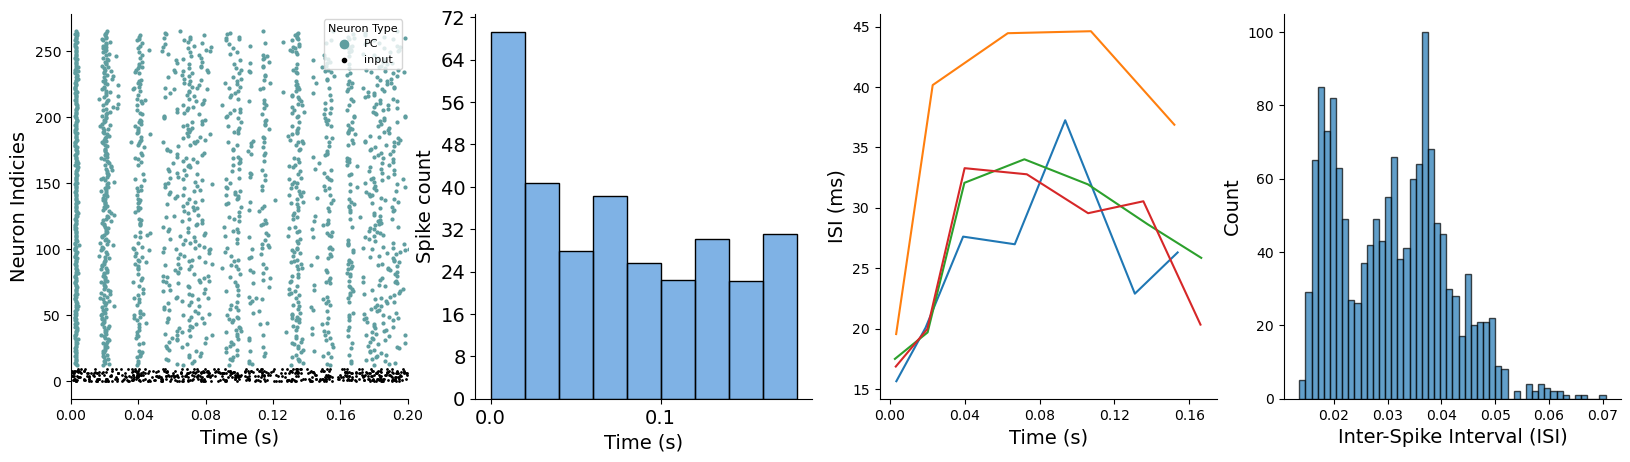

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Control variable for fontsize
FONT_SIZE = 14

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ax1, ax2, ax3, ax4 = axs

# Raster plot
ax1.scatter(pc_times, pc_id, c='cadetblue', s=4, label='PC')
ax1.scatter(input_time, input_id, c='k', s=1, label='input')
ax1.set_ylabel('Neuron Indicies', fontsize=FONT_SIZE)
ax1.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax1.legend(loc="upper right", title='Neuron Type', numpoints=1, fontsize=8, markerscale=3, title_fontsize=8)
ax1.set_xlim(0, duration)
ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) # Reduce number of x-ticks

# PSTH plot
bar_color = (0, 0.4, 0.8, 0.5)
ax2.bar(bins[:-1], psth, width=bin_size, align='edge', color=bar_color, edgecolor='black', linewidth=1)
ax2.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax2.set_ylabel('Spike count', fontsize=FONT_SIZE)
ax2.set_xticks(np.arange(0, duration, 0.1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

# ISI times plot
for i in range(len(isi_list) - 250):
    ax3.plot(isi_times[i], isi_list[i]*1000,label='neuron id: '+str(i))
ax3.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax3.set_ylabel('ISI (ms)', fontsize=FONT_SIZE)
ax3.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) # Reduce number of x-ticks

# ISI histogram
ax4.hist(all_isis, bins=50, edgecolor='black', alpha=0.7)
ax4.set_xlabel('Inter-Spike Interval (ISI)', fontsize=FONT_SIZE)
ax4.set_ylabel('Count', fontsize=FONT_SIZE)

# Remove top and right spines for all subplots
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()


In [15]:

pulse_duration=300000
rest=100000
events=poisson_gen(0,pulse_duration,[input_neurons],[50])
events=events+poisson_gen(pulse_duration+rest,pulse_duration,[input_neurons],[100])
events=events+poisson_gen(2*pulse_duration+2*rest,pulse_duration,[input_neurons],[200])
events=events+poisson_gen(3*pulse_duration+3*rest,pulse_duration,[input_neurons],[100])
events=events+poisson_gen(4*pulse_duration+4*rest,pulse_duration,[input_neurons],[300])




In [23]:
output_events=run_dynapse(neuron_config,board,events)
np.save(data_path+'SFA_Mult_Trains.npy',output_events)

initilize run dynapse
dummy events sent

getting fpga time


setting virtual neurons



/tmp/ipykernel_9786/3365478275.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


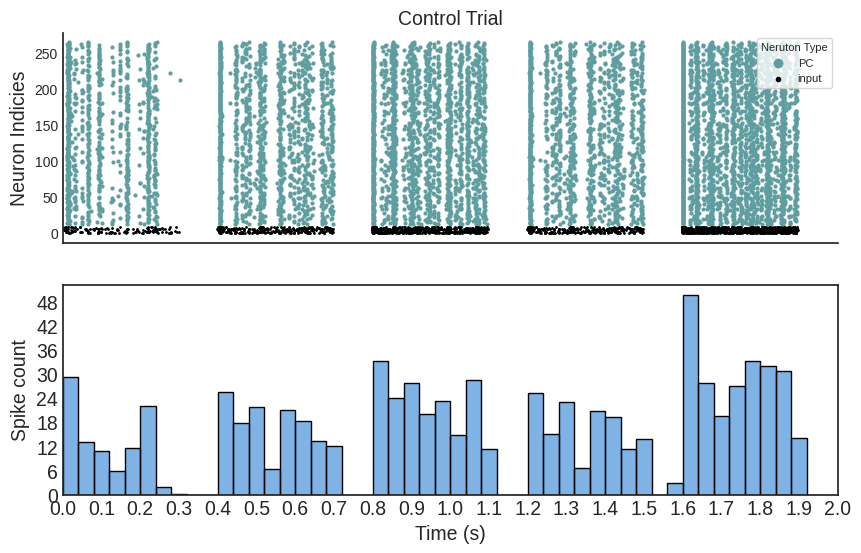

In [24]:
nvn=8
pvn=0
pcn=256
sstn=200
bin_size=0.100
duration=2

output_events=np.load(data_path+'SFA_Mult_Trains.npy',allow_pickle=True)
plt.style.use('seaborn-white')

output_events=np.asanyarray(output_events)
times=output_events[1]-output_events[1][0]
spike_id=output_events[0]
pc_id, pc_times = get_id_times(virual_n, neuron_n, spike_id, times)
bin_size=0.040

if virual_n > 0:
    input_id = spike_id[spike_id <= virual_n]
    input_time = times[spike_id <= virual_n]

[isi_list,isi_times]=extract_isi(pc_id,pc_times)
# PSTH plot
spike_times = spike_time_arrays(output_events, virual_n, neuron_n)[2]
psth, bins = psth_calc(spike_times, bin_size, duration)


if nvn > 0:
    input_id = spike_id[spike_id <= nvn]
    input_time = times[spike_id <= nvn]

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1 = axs[0]
ax2 = axs[1]

# Raster plot
ax1.scatter(pc_times,pc_id,c='cadetblue',s=4,label='PC')
ax1.scatter(input_time,input_id,c='k',s=1,label='input')

ax1.set_ylabel('Neuron Indicies',fontsize=14)
ax1.legend(loc="upper right", title='Neruton Type', numpoints=1, fontsize=8, markerscale=3, title_fontsize=8, frameon=True)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0,duration)
ax1.set_title('Control Trial',fontsize=14)


# PSTH plot
spike_times = spike_time_arrays(output_events, virual_n, neuron_n)[2]
psth, bins = psth_calc(spike_times, bin_size, duration)

# PSTH plot
bar_color = (0, 0.4, 0.8, 0.5)
ax2.bar(bins[:-1], psth, width=bin_size, align='edge', color=bar_color, edgecolor='black', linewidth=1)
ax2.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax2.set_ylabel('Spike count', fontsize=FONT_SIZE)
ax2.set_xticks(np.arange(0, duration, 0.1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.tick_params(axis='both', which='major', labelsize=FONT_SIZE)



<font size=8>No adaptation

In [57]:
for h in range(number_of_chips):
    for c in [0,1,2]:
        for n in range(256):
            myConfig.chips[h].cores[c].neurons[n].latch_so_adaptation = False
model.apply_configuration(myConfig)
time.sleep(1)



In [65]:
duration=.2
input_freq=300

events=poisson_gen(0,duration*1e6,[input_neurons],[input_freq])

output_events=run_dynapse(neuron_config,board,events)

np.save("SFA_off.npy", output_events)

initilize run dynapse
dummy events sent

getting fpga time


setting virtual neurons



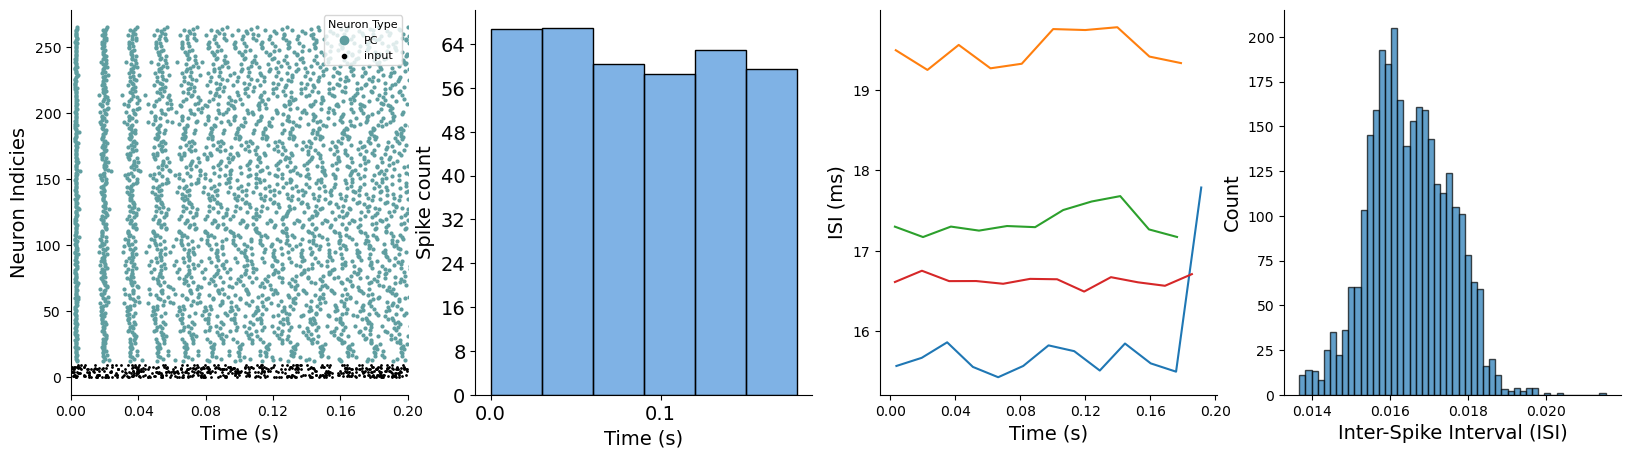

In [63]:
output_events=np.asanyarray(output_events)
times=output_events[1]-output_events[1][0]
spike_id=output_events[0]
neuron_n=Pyr.size
virual_n=input_neurons.size
pc_id, pc_times = get_id_times(virual_n, neuron_n, spike_id, times)
bin_size=0.030


if virual_n > 0:
    input_id = spike_id[spike_id <= virual_n]
    input_time = times[spike_id <= virual_n]

[isi_list,isi_times]=extract_isi(pc_id,pc_times)
# PSTH plot
spike_times = spike_time_arrays(output_events, virual_n, neuron_n)[2]
psth, bins = psth_calc(spike_times, bin_size, duration)
# Flatten the ISI lists
all_isis = np.concatenate(isi_list)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Control variable for fontsize
FONT_SIZE = 14

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ax1, ax2, ax3, ax4 = axs

# Raster plot
ax1.scatter(pc_times, pc_id, c='cadetblue', s=4, label='PC')
ax1.scatter(input_time, input_id, c='k', s=1, label='input')
ax1.set_ylabel('Neuron Indicies', fontsize=FONT_SIZE)
ax1.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax1.legend(loc="upper right", title='Neuron Type', numpoints=1, fontsize=8, markerscale=3, title_fontsize=8)
ax1.set_xlim(0, duration)
ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) # Reduce number of x-ticks

# PSTH plot
bar_color = (0, 0.4, 0.8, 0.5)
ax2.bar(bins[:-1], psth, width=bin_size, align='edge', color=bar_color, edgecolor='black', linewidth=1)
ax2.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax2.set_ylabel('Spike count', fontsize=FONT_SIZE)
ax2.set_xticks(np.arange(0, duration, 0.1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

# ISI times plot
for i in range(len(isi_list) - 250):
    ax3.plot(isi_times[i], isi_list[i]*1000,label='neuron id: '+str(i))
ax3.set_xlabel('Time (s)', fontsize=FONT_SIZE)
ax3.set_ylabel('ISI (ms)', fontsize=FONT_SIZE)
ax3.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) # Reduce number of x-ticks

# ISI histogram
ax4.hist(all_isis, bins=50, edgecolor='black', alpha=0.7)
ax4.set_xlabel('Inter-Spike Interval (ISI)', fontsize=FONT_SIZE)
ax4.set_ylabel('Count', fontsize=FONT_SIZE)

# Remove top and right spines for all subplots
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()


initilize run dynapse
dummy events sent

getting fpga time


setting virtual neurons



In [11]:
drain_neurons(myConfig,model)
undrain_neurons(myConfig,model,neuron_config)

In [12]:
nvn=8
pvn=0
pcn=256
sstn=200
bin_size=0.050
duration=2

output_events=np.load(data_path+'SFA_Control.npy',allow_pickle=True)
plt.style.use('seaborn-white')

output_events=np.asanyarray(output_events)
times=output_events[1]-output_events[1][0]
spike_id=output_events[0]
pc_id, pc_times = get_id_times(nvn, pcn, spike_id, times)
pv_id, pv_times = get_id_times(nvn + 1 + pcn, pvn, spike_id, times)
sst_id, sst_times = get_id_times(nvn + 2 + pcn + pvn, sstn, spike_id, times)

if nvn > 0:
    input_id = spike_id[spike_id <= nvn]
    input_time = times[spike_id <= nvn]

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1 = axs[0]
ax2 = axs[1]

# Raster plot
ax1.scatter(pc_times,pc_id,c='cadetblue',s=4,label='PC')
ax1.scatter(pv_times,pv_id,c='lightcoral',s=4,label='PV')
ax1.scatter(sst_times,sst_id,c='sandybrown',s=4,label='SST')
ax1.scatter(input_time,input_id,c='k',s=1,label='input')

ax1.set_ylabel('Neuron Indicies',fontsize=14)
ax1.legend(loc="upper right", title='Neruton Type', numpoints=1, fontsize=8, markerscale=3, title_fontsize=8, frameon=True)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0,duration)
ax1.set_title('Control Trial',fontsize=14)


# PSTH plot
spike_times = spike_time_arrays(output_events, nvn, pvn, pcn, sstn)[2]
psth, bins = psth_calc(spike_times, bin_size, duration)

if pcn>0:
    bar_color = (0, 0.4, 0.8, 0.5)
elif pvn>0:
    bar_color = (1.00, 0.50196, 0.50196,.5)
elif sstn>0:
    bar_color = (1.00000, 0.65098, 0.30196,.5)
else:
    bar_color = (0.70196, 0.70196, 0.80000,.5)

ax2.bar(bins[:-1], psth, width=bin_size, align='edge', color=bar_color, edgecolor='black', linewidth=1)

ax2.set_xlabel('Time (s)', fontsize=14)
ax2.set_ylabel('Spike count', fontsize=14)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xticks(np.arange(0,duration, 0.1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.tick_params(axis='both', which='major', labelsize=12)



FileNotFoundError: [Errno 2] No such file or directory: '/home/hector/Documents/dynapse-se2-data/general_tests/SFA_Control.npy'

In [183]:
def compute_isi(spike_times_all, spike_id, indices_range):
    ff_list = []
    time_list = []
    for i in indices_range:
        occurences = spike_times_all[spike_id == i]
        if len(occurences) > 0:
            isi = np.diff(occurences)
            if len(isi) > 0 and not (isi == 0).any():
                ff_list.append(1 / isi)
                time_list.append(occurences[:-1])
    return ff_list, time_list

def frequency_arrays(output_events, nvn, pcn, pvn, sstn):
    output_events = np.asanyarray(output_events)
    spike_times_all = output_events[1] - output_events[1][0]
    spike_id = output_events[0]
    neuron_data = {}

    if pcn > 0:
        neuron_data["PC"] = compute_isi(spike_times_all, spike_id, range(nvn + 1, pcn + 1 + nvn))
    if pvn > 0:
        neuron_data["PV"] = compute_isi(spike_times_all, spike_id, range(nvn + pcn + 1, nvn + pcn + pvn + 1))
    if sstn > 0:
        neuron_data["SST"] = compute_isi(spike_times_all, spike_id, range(nvn + pcn + pvn + 1, nvn + pcn + pvn + sstn + 1))
    
    return neuron_data

# ... (put your previous code here)

neuron_data = frequency_arrays(output_events, nvn, pcn, pvn, sstn)

<font size=8> Now Adaptation

In [251]:

for h in range(number_of_chips):
    for c in [0,1,2]:
        for n in range(256):
            myConfig.chips[h].cores[c].neurons[n].latch_so_adaptation = True
model.apply_configuration(myConfig)
time.sleep(1)


In [255]:

for c in range(4):
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_PWTAU_N',2,200)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_GAIN_P', 3,200)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_TAU_P', 0,100)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_W_N', 3,200)
   set_parameter(myConfig.chips[0].cores[c].parameters, 'SOAD_CASC_P', 5,250)
model.apply_configuration(myConfig)
time.sleep(0.1)

In [256]:
data_path='/home/hector/Documents/dynapse-se2-data/general_tests/'
output_events=run_dynapse(neuron_config,board,events)
np.save(data_path+'SFA_Trial.npy',output_events)


initilize run dynapse
initilize run dynapse

getting fpga time


setting virtual neurons



<font size=8>


/tmp/ipykernel_59093/3229792709.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


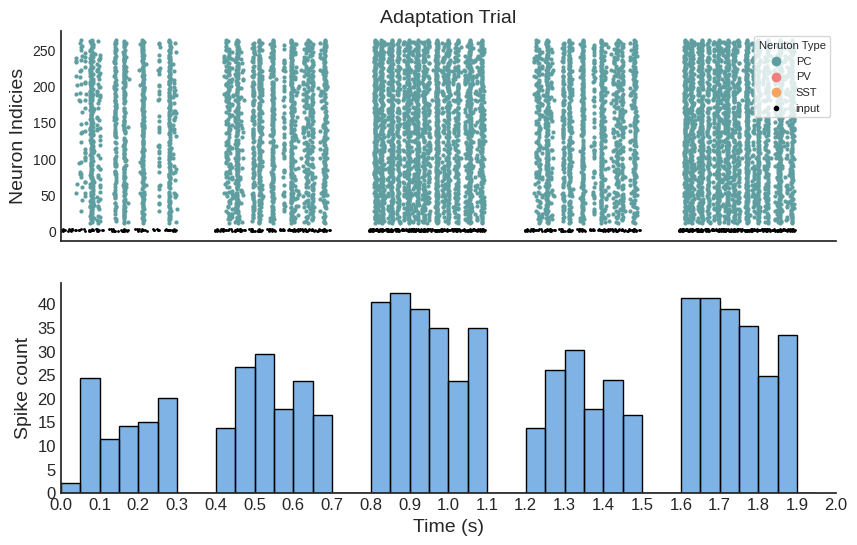

In [257]:
nvn=7
pvn=200
pcn=256
sstn=200
bin_size=0.050
duration=2

plt.style.use('seaborn-white')

output_events=np.load(data_path+'SFA_Trial.npy',allow_pickle=True)


output_events=np.asanyarray(output_events)
times=output_events[1]-output_events[1][0]
spike_id=output_events[0]
pc_id, pc_times = get_id_times(nvn, pcn, spike_id, times)
pv_id, pv_times = get_id_times(nvn + 1 + pcn, pvn, spike_id, times)
sst_id, sst_times = get_id_times(nvn + 2 + pcn + pvn, sstn, spike_id, times)

if nvn > 0:
    input_id = spike_id[spike_id <= nvn]
    input_time = times[spike_id <= nvn]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 6), sharex=True)

# Raster plot
ax1.scatter(pc_times,pc_id,c='cadetblue',s=4,label='PC')
ax1.scatter(pv_times,pv_id,c='lightcoral',s=4,label='PV')
ax1.scatter(sst_times,sst_id,c='sandybrown',s=4,label='SST')
ax1.scatter(input_time,input_id,c='k',s=1,label='input')

ax1.set_ylabel('Neuron Indicies',fontsize=14)
ax1.legend(loc="upper right", title='Neruton Type', numpoints=1, fontsize=8, markerscale=3, title_fontsize=8, frameon=True)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0,duration)
ax1.set_title('Adaptation Trial',fontsize=14)
# PSTH plot
spike_times = spike_time_arrays(output_events, nvn, pvn, pcn, sstn)[2]
psth, bins = psth_calc(spike_times, bin_size, duration)

if pcn>0:
    bar_color = (0, 0.4, 0.8, 0.5)
elif pvn>0:
    bar_color = (1.00, 0.50196, 0.50196,.5)
elif sstn>0:
    bar_color = (1.00000, 0.65098, 0.30196,.5)
else:
    bar_color = (0.70196, 0.70196, 0.80000,.5)

ax2.bar(bins[:-1], psth, width=bin_size, align='edge', color=bar_color, edgecolor='black', linewidth=1)

ax2.set_xlabel('Time (s)', fontsize=14)
ax2.set_ylabel('Spike count', fontsize=14)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xticks(np.arange(0,duration, 0.1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.show()

<font size=8> Attempt to record and go,this dosent work for some reason

In [9]:
neuron_config['input_type']='Poisson 2'

def measure_dynapse_run(neuron_config, board,events, frequency, duration):
    # Define constants
    CHANNEL = 0  # Use first channel
    FREQUENCY = frequency  # Sampling frequency
    DURATION = duration  # Duration of recording in seconds
    BUFFER_SIZE = int(FREQUENCY * DURATION)  # Number of samples
    time_values = None
    samples = None
    result = {}
    try:
        # Create a DWF instance
        analog_instrument = dwf.DwfAnalogIn()
        # Open the first available device
        analog_instrument.channelEnableSet(CHANNEL, True)
        analog_instrument.channelRangeSet(CHANNEL, 1.0)  # Set voltage range to -5V to +5V
        # Set the sample rate and buffer size
        analog_instrument.frequencySet(FREQUENCY)
        analog_instrument.recordLengthSet(DURATION)
        # Wait for the device to settle
        time.sleep(.5)
        # Start the acquisition
        analog_instrument.configure(False, True)
        time.sleep(.02)
        # Start another function in a separate thread
        threading.Thread(target=run_dynapse_thread, args=(neuron_config, board, events, result)).start()
        # Wait until the acquisition is done
        while True:
            if analog_instrument.status(True) == dwf.DwfStateDone:
                break
        # Get the acquired samples
        samples = analog_instrument.statusData(CHANNEL, BUFFER_SIZE)
        samples=np.array(samples)*1000
        # Generate corresponding time values
        time_values = np.linspace(0, DURATION, num=BUFFER_SIZE, endpoint=False)
    finally:
        # Always close the device
        analog_instrument.close()
    return time_values, samples, result.get('output', None)

[time_values_1,voltages_1,output_events]=measure_dynapse_run(neuron_config,board,events,frequency=1000,duration=5)
print(output_events)

initilize run dynapse
initilize run dynapse

getting fpga time



KeyboardInterrupt: 


setting virtual neurons



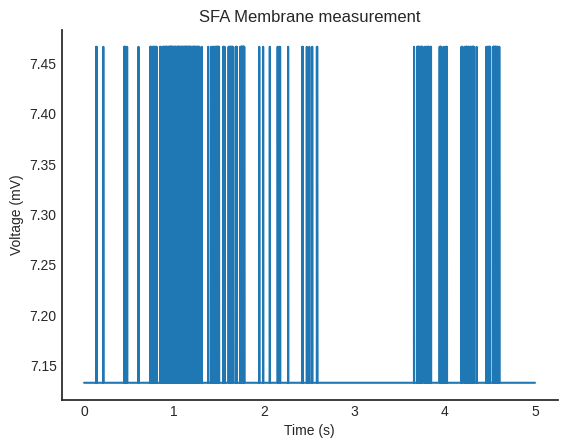

In [12]:
fig,ax=plt.subplots()
ax.plot(time_values_1, voltages_1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (mV)')
ax.set_title('SFA Membrane measurement')#set DC on neurons

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [13]:
def get_id_times(nvn, pcn, test_id, time):
    id = []
    times = []
    if pcn > 0:
        condition = (test_id > nvn + 1) & (test_id < nvn + 1 + pcn)
        id = test_id[condition]
        times = time[condition]
    return id, times


In [14]:
nvn=4
pvn=200
pcn=256
sstn=200
plt.style.use('seaborn-white')
output_events=np.asanyarray(output_events)
times=output_events[1]-output_events[1][0]
spike_id=output_events[0]
pc_id, pc_times = get_id_times(nvn, pcn, spike_id, times)
pv_id, pv_times = get_id_times(nvn + 1 + pcn, pvn, spike_id, times)
sst_id, sst_times = get_id_times(nvn + 2 + pcn + pvn, sstn, spike_id, times)
if nvn > 0:
    input_id = spike_id[spike_id <= nvn]
    input_time = times[spike_id <= nvn]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pc_times,pc_id,c='cadetblue',s=4,label='PC')
ax.scatter(pv_times,pv_id,c='lightcoral',s=4,label='PV')
ax.scatter(sst_times,sst_id,c='sandybrown',s=4,label='SST')
ax.scatter(input_time,input_id,c='k',s=1,label='input')
ax.set_xlabel('Time (s)',fontsize=18)
ax.set_ylabel('Neuron Indicies',fontsize=18)
ax.legend(loc="upper right", title='Neruton Type', numpoints=1, fontsize=8, markerscale=3, title_fontsize=8, frameon=True)
#set Time stamp
#set input strenght annotation
#set CV and Synaptic strength annotation
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

/tmp/ipykernel_18182/1795837453.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [22]:
def frequency_arrays(output_events):
    output_events=np.asanyarray(output_events)
    spike_times_all=output_events[1]-output_events[1][0]
    spike_id=output_events[0]
    pc_ff_list=[]
    pc_time_list=[]
    pvn_ff_list=[]
    pvn_time_list=[]
    sstn_ff_list=[]
    sstn_time_list=[]
    nvn=4
    pcn=255
    pvn=0
    sstn=0
    if pcn>0:
        for i in range(nvn+1,pcn+1+nvn):  
                    occurences=spike_times_all[spike_id==i]
                    ocurrence_times=spike_times_all[spike_id==i]
                    if len(occurences)>0:
                        isi=np.diff(occurences)
                        if(isi==0).any():
                            print("removed")
                        else:
                            #numpy append to isi to ff list
                            pc_ff_list.append(1/isi)
                            pc_time_list.append(ocurrence_times)
    if pvn>0:
        for i in range(nvn+pcn+1,nvn+pcn+pvn+1):
                    occurences=spike_times_all[spike_id==i]
                    ocurrence_times=spike_times_all[spike_id==i]
                    if len(occurences)>0:
                        isi=np.diff(occurences)
                        if(isi==0).any():
                            print("removed")
                        else:
                            #numpy append to isi to ff list
                            pvn_ff_list.append(1/isi)
                            pvn_time_list.append(ocurrence_times)
    if sstn>0:
        for i in range(nvn+pcn+pvn+1,nvn+pcn+pvn+sstn+1):
                    occurences=spike_times_all[spike_id==i]
                    ocurrenc# Frequency over time plot for PC neurons
if "PC" in neuron_data:
    pc_ff_list, pc_time_list = neuron_data["PC"]
    ax3 = axs[2]
    # Flattening the lists and plotting
    ax3.scatter(np.concatenate(pc_time_list), np.concatenate(pc_ff_list), s=1)
    ax3.set_ylabel('PC Frequency (Hz)', fontsize=14)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.set_ylim(bottom=0)

# Frequency over time plot for PV neurons
if "PV" in neuron_data:
    pvn_ff_list, pvn_time_list = neuron_data["PV"]
    ax4 = axs[3]
    # Flattening the lists and plotting
    ax4.scatter(np.concatenate(pvn_time_list), np.concatenate(pvn_ff_list), s=1)
    ax4.set_xlabel('Time (s)', fontsize=14)
    ax4.set_ylabel('PV Frequency (Hz)', fontsize=14)
    ax4.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.set_ylim(bottom=0)
plt.show()e_times=spike_times_all[spike_id==i]
                    if len(occurences)>0:
                        isi=np.diff(occurences)
                        if(isi==0).any():
                            print("removed")
                        else:
                            #numpy append to isi to ff list
                            sstn_ff_list.append(1/isi)
                            sstn_time_list.append(ocurrence_times)
    return pc_ff_list, pc_time_list, pvn_ff_list, pvn_time_list, sstn_ff_list, sstn_time_list
[pc_ff_list, pc_time_list, pvn_ff_list, pvn_time_list, sstn_ff_list, sstn_time_list]=frequency_arrays(output_events)

In [3]:
def compute_isi(spike_times_all, spike_id, indices_range):
    ff_list = []
    time_list = []
    for i in indices_range:
        occurences = spike_times_all[spike_id == i]
        if len(occurences) > 0:
            isi = np.diff(occurences)
            if len(isi) > 0 and not (isi == 0).any():
                ff_list.append(1 / isi)
                time_list.append(occurences[:-1])
    return ff_list, time_list

def frequency_arrays(output_events, nvn, pcn, pvn, sstn):
    output_events = np.asanyarray(output_events)
    spike_times_all = output_events[1] - output_events[1][0]
    spike_id = output_events[0]
    neuron_data = {}

    if pcn > 0:
        neuron_data["PC"] = compute_isi(spike_times_all, spike_id, range(nvn + 1, pcn + 1 + nvn))
    if pvn > 0:
        neuron_data["PV"] = compute_isi(spike_times_all, spike_id, range(nvn + pcn + 1, nvn + pcn + pvn + 1))
    if sstn > 0:
        neuron_data["SST"] = compute_isi(spike_times_all, spike_id, range(nvn + pcn + pvn + 1, nvn + pcn + pvn + sstn + 1))
    
    return neuron_data

# ... (put your previous code here)

neuron_data = frequency_arrays(output_events, nvn, pcn, pvn, sstn)

NameError: name 'output_events' is not defined

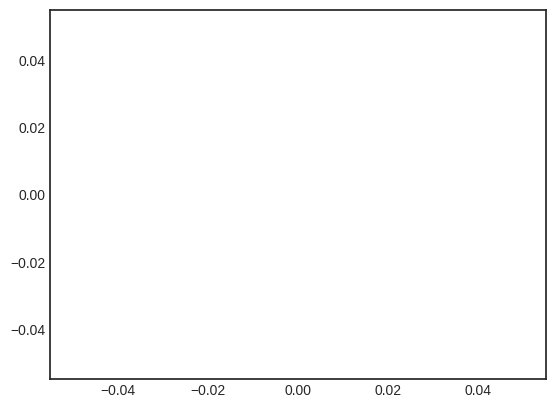

In [23]:
i=30
plt.plot(pc_time_list[i][:-1],pc_ff_list[i])

In [ ]:
# Frequency over time plot for PC neurons
if "PC" in neuron_data:
    pc_ff_list, pc_time_list = neuron_data["PC"]
    ax3 = axs[2]
    # Flattening the lists and plotting
    ax3.scatter(np.concatenate(pc_time_list), np.concatenate(pc_ff_list), s=1)
    ax3.set_ylabel('PC Frequency (Hz)', fontsize=14)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.set_ylim(bottom=0)

# Frequency over time plot for PV neurons
if "PV" in neuron_data:
    pvn_ff_list, pvn_time_list = neuron_data["PV"]
    ax4 = axs[3]
    # Flattening the lists and plotting
    ax4.scatter(np.concatenate(pvn_time_list), np.concatenate(pvn_ff_list), s=1)
    ax4.set_xlabel('Time (s)', fontsize=14)
    ax4.set_ylabel('PV Frequency (Hz)', fontsize=14)
    ax4.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.set_ylim(bottom=0)
plt.show()